In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
# from tensorflow import keras
# from tensorflow.keras import layers
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Dense, Activation, Dropout,LSTM
from numpy.random import seed
from math import sqrt
from sklearn.preprocessing import MinMaxScaler

Read data

In [ ]:
# Read data
# Here we are reading data from excel
gdp_data = pd.read_excel(
    "API_NY.GDP.MKTP.CD_DS2_en_excel_v2_6553527 - Copy.xls", sheet_name="Data")
diesel_demand = pd.read_excel(
    "Petrolem Demand.xlsx", sheet_name="Diesel_Finalized")
petrol_demand = pd.read_excel(
    "Petrolem Demand.xlsx", sheet_name="Petrol_Finalized")
gas_demand = pd.read_excel("Petrolem Demand.xlsx", sheet_name="LPG_Finalized")

Drop un wanted rows

In [ ]:
diesel_demand.columns = diesel_demand.iloc[0]
diesel_demand.drop(index=0, axis=0, inplace=True)

gas_demand.columns = gas_demand.iloc[0]
gas_demand.drop(index=0, axis=0, inplace=True)

petrol_demand.columns = petrol_demand.iloc[0]
petrol_demand.drop(index=0, axis=0, inplace=True)

In [ ]:
gdp_data.columns = gdp_data.iloc[2]
gdp_data.drop(index=[0, 1, 2], axis=0, inplace=True)

Drop unncessary data from gdp file

In [ ]:

zwe_gdp = gdp_data[gdp_data['Country Code'] == "ZWE"]
zwe_gdp = zwe_gdp.drop(columns=['Country Name',   'Country Code', 'Indicator Name', 'Indicator Code',
                                1960.0,           1961.0,           1962.0,           1963.0,
                                1964.0,           1965.0,           1966.0,           1967.0,
                                1968.0,           1969.0,           1970.0,           1971.0,
                                1972.0,           1973.0,           1974.0,           1975.0,
                                1976.0,           1977.0,           1978.0,           1979.0,
                                1980.0,           1981.0,           1982.0,           1983.0,
                                1984.0,           1985.0,           1986.0,           1987.0,
                                1988.0,           1989.0,           1990.0,           1991.0,
                                1992.0,           1993.0,           1994.0,           1995.0,
                                1996.0,           1997.0,           1998.0,           1999.0,
                                2000.0,           2001.0,           2002.0,           2003.0,
                                2004.0,           2005.0,           2006.0,           2007.0,
                                2008.0], axis=1)

In [ ]:
zwe_gdp.dropna(inplace=True, axis=1)

In [ ]:

zwe_gdp[2023] = np.mean(np.array(zwe_gdp))

Transform data into appropriate format

In [ ]:
def get_data(data, product, _data=pd.DataFrame({'Date': [], "Product": [], "GDP": [], "Demand": []})):
    cols = data['Year']
    for year in cols:
        demand = data[data['Year'] == year]
        if year != 'Grand Total':
            for month in demand.columns:
                if (month != "Year") and (month != "Grand Total"):
                    new_row = {'Date': f"01 {month} {year}", "Product": product, "GDP": zwe_gdp[int(
                        year)].values[0], 'Demand': demand[month].values[0]}
                    _data.loc[len(_data)] = new_row
    return _data


data = get_data(diesel_demand, "Diesel")
# data=get_data(gas_demand,"Gas",data)
data = get_data(petrol_demand, "Petrol_demand", data)


data['GDP'] = data['GDP']/12

Encode Categorial Column

In [ ]:
data['Product'] = data['Product'].astype('category').cat.codes

In [ ]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [ ]:
# data.to_excel("Transformed Data.xlsx",sheet_name="data")

In [ ]:
data['Date'] = pd.to_numeric(pd.to_datetime(data['Date']))
# diesel_demand['Date']=pd.to_numeric(pd.to_datetime(diesel_demand['Date']))
# petrol_demand['Date']=pd.to_numeric(pd.to_datetime(petrol_demand['Date']))

Scale and Split data into train and test

In [ ]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

Y = np.array(Y)
X = np.array(X)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_X_data = scaler.fit_transform(X)
scaled_Y_data = scaler.fit_transform(Y.reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(
    scaled_X_data, scaled_Y_data, test_size=0.2)

Support Vectore Machine, Regression

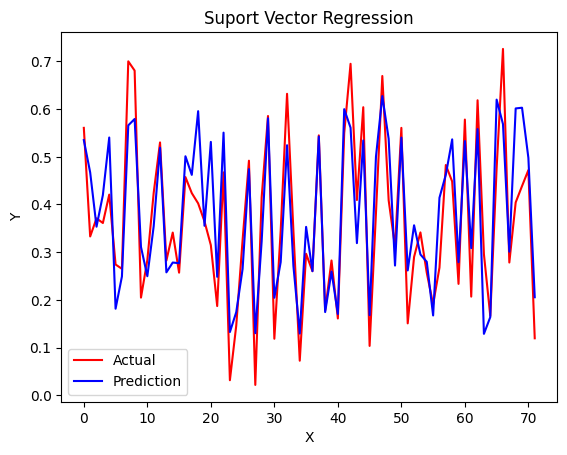

0.7320371296105153

In [ ]:
svr_model = SVR()
svr_model.fit(x_train, y_train.ravel())
svr_predict = svr_model.predict(x_test)
plt.plot(y_test, label='Actual', color='red')
plt.plot(svr_predict, label='Prediction', color='blue')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Suport Vector Regression')
plt.show()
r2_score(y_test, svr_predict)

Random Forest

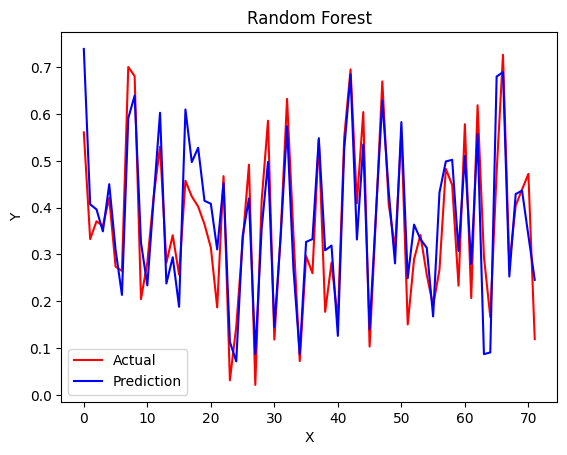

0.7872130901319939

In [ ]:

random_forest_model = RandomForestRegressor(
    n_estimators=200, criterion="poisson")
random_forest_model.fit(x_train, y_train.ravel())
random_forest_predict = random_forest_model.predict(x_test)
plt.plot(y_test, label='Actual', color='red')
plt.plot(random_forest_predict, label='Prediction', color='blue')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Random Forest')
plt.show()
score = r2_score(y_test, random_forest_predict)
score

Decision Tree Regressor

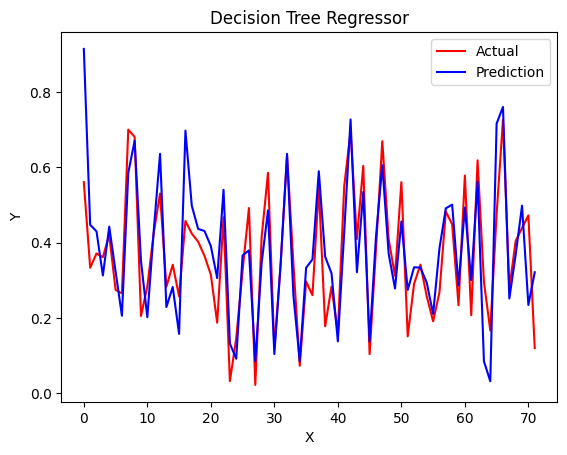

0.6390393978115962

In [ ]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(x_train, y_train)
decision_tree_predict = decision_tree_model.predict(x_test)


plt.plot(y_test, label='Actual', color='red')
plt.plot(decision_tree_predict, label='Prediction', color='blue')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Decision Tree Regressor')
plt.show()
r2_score(y_test, decision_tree_predict)

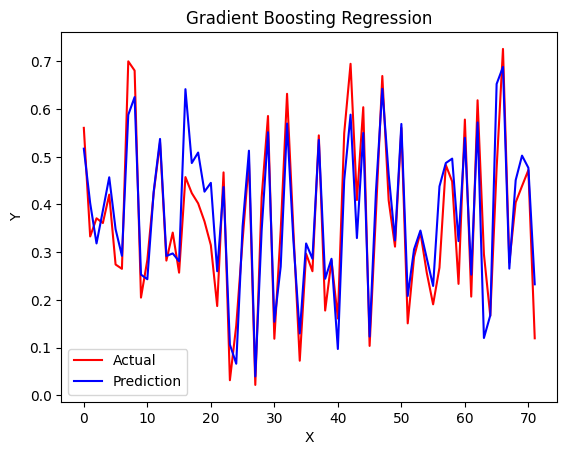

0.8397700501495917

In [ ]:
gradient_boosting_model = GradientBoostingRegressor(
    n_estimators=207, loss="squared_error", alpha=0.01)
gradient_boosting_model.fit(x_train, y_train.ravel())
gradient_boosting_predict = gradient_boosting_model.predict(x_test)

plt.plot(y_test, label='Actual', color='red')
plt.plot(gradient_boosting_predict, label='Prediction', color='blue')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Gradient Boosting Regression')
plt.show()
r2_score(y_test, gradient_boosting_predict)